# Developed By: Muhammad Imran

# 1- Importing Libraries and Definitions of My Functions

In [56]:
import numpy as np                  #importing np for assigning np.random() to beta1 and beta2, and also use for arrays in the code
import pandas as pd                 #importing for reading and getting csv and excel files
import matplotlib.pyplot as plt     #importing for plotting mathematical graphs and linear representations

# start of univariate_linear_regression()

def univariate_linear_regression(x, beta):    #predicting predicted y values by putting beta parameter in the formula= B1 + B2*X
    beta_1 = beta[0]  # assigning value in index 0 to beta_1
    beta_2 = beta[1]  # assigning value in index 1 to beta_2
    
    #simple linear regression formula: fb(X) = B1 + B2*X  (y = mx+c)
    predicted_y = beta_1 * beta_2 * x  #y = b1 + b2*x (y = mx+ c) :- where m and c are slope and intercept
    return predicted_y    #returning the values of predicted_y after calculating above

#end of univariate_linear_regression()

#start of cost_function()
    
def cost_function(x,y,beta):
    n = x.shape[0] #number of samples or rows which will used in division, according to cost function formula
    
     # cost function = j(B1,B2) = 1/2n sum of :n,i=1 (f(xi)-yi)^2       :- where f(xi) = predicted_y
    
    predicted_y = univariate_linear_regression(x, beta) #calling univariate_linear_regression() and assign it to predicted y
    est_error = np.sum((predicted_y - y)**2) # sum of :n,i=1 (f(xi)-yi)^2
    
    return est_error/n  #1/2n est_error  :- where est_error = sum of :n,i=1 (f(xi)-yi)^2

#end of cost_function()


#start of gradient()

def gradient(x,y,beta):
    n = x.shape[0] #number of samples or rows which will used in division, according to gradient descent
    #n = len(x)

    J = np.zeros(2,)  #assiging zeros to both J(B1) and J(B2) in the start
    predicted_y = univariate_linear_regression(x, beta)
    
    #After taking derivatives, we just write 𝜕/𝜕𝛽𝑗 J(𝛽1,𝛽2) for j =0,1 to below code
    J[0] = np.sum(predicted_y - y)      #sum of (predicted_y - y) for J(𝛽1) After taking Derivatives
    J[1] = np.dot(x.T,predicted_y - y)  #sum of (predicted_y - y)X for J(𝛽2) After taking Derivatives
    #tanspose(T) means converting rows to columns and columns to rows
    #multiplication rule in matrix is that the number of columns should be equal to the number of rows,,, 
    #we cannot multiply same dimension matrix according to multiplication rule 
    #that's why we take x.T (taking transpose of X values), it's works like 
    #
    #let x = [3]     x.T = [3 2 5] * predicted_y - y values ,let, [3]   [2]     [1]                [1] 
    #        [2]                                                  [2] - [1]  =  [1] =   [3 2 5 ] * [1] = 15 = J 
    #        [5]                                                  [3] - [1]     [2]                [2]
    
    
    return J/n 
    #dividing by total number of values and returning both J(𝛽1,𝛽2) because J variable contains both values in 0 and 1 indexes

#end of gradient()


#start of gradient_descent()

def gradient_descent(x,y,lr, n_iter): #where lr is learning rate and n_iter is number of iteration to minize gradient descent
    
    n = len(x) #number of samples or rows which will used in division, according to gradient descent
    beta = np.zeros(2,) #take beta values 0 in the start
    error_list = []     #empty list, later use for to insert errors 1 by 1 from cost function in the loop
    
    for i in range(n_iter):
        cost_func = cost_function(x,y,beta) 
        error_list.append(cost_func)
        #calling cost function and insert estimated error in error list 1 by 1
        
        grad = gradient(x,y,beta)
        #gradient formula= Bj := Bj -  𝛼 * 𝜕/𝜕𝛽𝑗  J(𝛽1,𝛽2) for j =0,1
        
        beta = beta - (lr * grad) # beta has 2 values and gradient has also has 2 values so it automatically going to update the correct values of beta
    
    return error_list,beta

#end of gradient_descent()



# 2- Getting values from excel or csv files using pandas library

In [57]:
data = pd.read_csv('kc_house_data.csv') #getting csv file to data variable through pandas by calling read_csv() function
x = data.iloc[:, 5]   #get sqft_living variable(5th index in the csv file) and assign it to x
y = data.iloc[:, 2]   #get price variable(5th index in the csv file) and assign it to y

#data = pd.read_csv("kc_house_data.csv") 

#x = data["sqft_living"]    
#y = data["price"]           
#x = np.array(x)    # it means convert sqft_living column in the data frame to numpy array and assign the values to x var
#y = np.array(y)     #it means convert price column in the data frame to numpy array and assign the values to y var

#from sklearn.datasets.samples_generator import make_regression
#x, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
#m = 200

# 3- Simple Linear Graph of X and Y

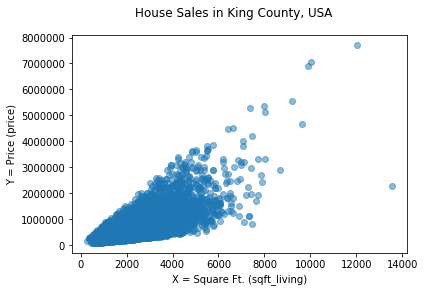

In [58]:

plt.scatter(x,y,alpha=.5, marker = 'o')           # Displaying simple linear graph of X and Y
plt.suptitle('House Sales in King County, USA')   # Adding Title which is also the name of Data set
plt.xlabel("X = Square Ft. (sqft_living)")        # Adding X title
plt.ylabel("Y = Price (price)")                   # Adding Y title
plt.savefig('sample_output_1.jpg', dpi = 300)    # Saving output samples, following Assignment 1 rule , dpi = 300 parameter means Instead of the usual 800 x 600 pixels output, it will be 2400 x 1800 pixels.
plt.show()                                        # Displaying Graph

# 4- Getting Error and Beta values By Gradient Descent and Cost Function

In [59]:
est_error,beta = gradient_descent(x,y,lr=0.0000001, n_iter= 50)  
#when my learning rate was 0.01 and then i change it upto 0.000001 because it was showing scalar error, now in case of 0.0000001 the code is working perfectly
est_error   #showing estimated errors

[426471343102.3953,
 406770330692.53217,
 352998950246.59357,
 281473682781.51483,
 211413532172.76505,
 155612541734.25494,
 117581047783.95757,
 94558616797.5761,
 81795749049.81354,
 75149629309.80237,
 71830450345.64622,
 70213622826.13693,
 69434630120.43126,
 69058899679.91057,
 68875494168.56935,
 68783991854.45952,
 68736936987.88081,
 68711843462.78286,
 68697928909.23532,
 68689914704.61394,
 68685140828.30435,
 68682218262.57568,
 68680392359.934875,
 68679236291.87228,
 68678499432.798225,
 68678029799.35661,
 68677732802.5811,
 68677548395.5899,
 68677437902.10677,
 68677376152.36069,
 68677346648.4126,
 68677338523.15107,
 68677344594.58791,
 68677360105.55939,
 68677381900.313866,
 68677407883.32854,
 68677436662.17651,
 68677467311.20625,
 68677499214.877945,
 68677531963.779945,
 68677565285.55507,
 68677598998.992,
 68677632983.5024,
 68677667158.8227,
 68677701471.51351,
 68677735885.97938,
 68677770378.494965,
 68677804933.231285,
 68677839539.611946,
 68677874190.5

# 5- Ploting Estimated Error Graph

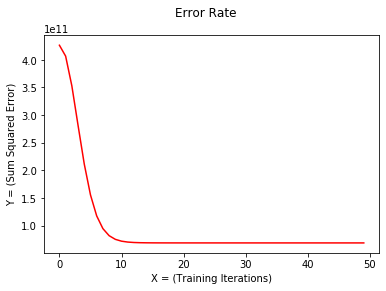

In [60]:
plt.plot(est_error, c="red")
plt.suptitle('Error Rate')                 # Adding Title
plt.xlabel("X = (Training Iterations)")    # Adding X title
plt.ylabel("Y = (Sum Squared Error)")                 # Adding Y title
plt.savefig('sample_output_2.jpg', dpi = 300)         # Saving output samples, following Assignment 1 rule
plt.show()                                 # Displaying Graph

# 6- Displaying Gradient Descent Graph and Best Fit Line

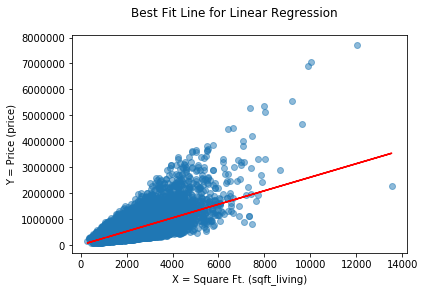

In [61]:
predicted_y = univariate_linear_regression(x, beta)   #getting value of predicted y by calling function
plt.scatter(x,y,alpha=.5, marker = 'o')               #Displaying Simple graph of X and Y
plt.suptitle('Best Fit Line for Linear Regression')   #Adding Title which is also the name of Data set
plt.xlabel("X = Square Ft. (sqft_living)")            # Adding X title
plt.ylabel("Y = Price (price)")                       # Adding Y title
plt.plot(x,predicted_y, c="red")                      #Plotting Red color Best Fit Line 
plt.savefig('sample_output_3.jpg', dpi = 300)                # Saving output samples, following Assignment 1 rule
plt.show()

              

# 7- Extra Step: Printing predicted_y values

In [62]:
predicted_y = univariate_linear_regression(x, beta)
print(predicted_y)

0        308323.112310
1        671517.286980
2        201193.895321
3        512129.915362
4        438968.498882
             ...      
21608    399774.882910
21609    603581.685963
21610    266516.588607
21611    418065.237030
21612    266516.588607
Name: sqft_living, Length: 21613, dtype: float64


In [63]:
#from sympy import *
#k = Symbol('x')
#l = Symbol('y')

#f = 2*k**2+3*l**3
#f_prime = f.diff(l)
#f_prime